In [1]:
# Cell #1
# Jupyter Notebook 'Iris data plotting'
# Goal: demonstration of matplotlib
# By: H.J. Megens
# Where you can reach me: hendrik-jan.megens -at- wur.nl
# Last modified: 25 September 2016

# modified from:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
%matplotlib inline

In [2]:
# Cell #2
# import some data to play with
# R.A. Fisher's famous Iris dataset, built into Scikit-Learn module
iris = datasets.load_iris() 

# we take the first two features (corresponding to sepal width and length).
X1 = iris.data[:, :2]

# we take the last two features (corresponding to petal width and height).
X2 = iris.data[:,2 :] 

# and we create a vector with 0s, 1s and 2s that represent 'setosa', 
# 'versicolor', and 'virginica', respectively
Y = iris.target


In [3]:
# Cell #3
# content of the Iris dataset; 
#it is a dictionary with different elements, 
# including a few lists and a numpy array that contains the data.
iris.keys()

dict_keys(['target_names', 'feature_names', 'DESCR', 'target', 'data'])

In [4]:
# Cell #4
# names of the different species ('targets')
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [5]:
# Cell #5
# feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Cell #6
# first 10 rows of data
iris.data[:10,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [7]:
# Cell #7
# This subroutine does most of the plotting

def plot_stuff(data,X,Y,pos,featureX,featureY):
    
    # add subplot
    ax = fig.add_subplot(pos) 
    # define a tuplie with colors to use; matplotlib understands keywords or only first letters
    cols = ('b','g','r') 
    
    # define minimum and maximum of values to scale the axes of the plot.
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # we build the plot species by species
    # note that Y is a vector containing many 0s, 1s and 2s, in the correct order for each row in the data
    # by using 'set(Y)' we make a set object that contains only one 0, one 1, and one 2
    for i in set(Y):
    
        # smart indexing to only extract the rows from the data matrix that contains rows pertaining to
        # the correct species
        x = X[:, 0][Y==i]
        y = X[:, 1][Y==i]
        
        # We plot the point for species i
        sc =ax.scatter(x, y, c=cols[i])
        
        # and we calculate the correlation coefficient, and the slope and intercept point
        cf = np.corrcoef(x,y)[0,1]
        slope,intercept = np.polyfit(x,y,1)
        
        # ... which we then plot on top of the existing plot, including a label
        ax.plot(x,x*slope+intercept, c = cols[i], label = 'cor=%.2f, a=%.2f b=%.2f' % (cf,slope,intercept))


    # write the label for X and Y axis 
    ax.set_xlabel(featureX)
    ax.set_ylabel(featureY)

    # and set the minimum and maximum values for X and Y axis
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Finally, plot the legend, and define fontsize and position
    ax.legend(loc = 'lower right',fontsize='x-small')


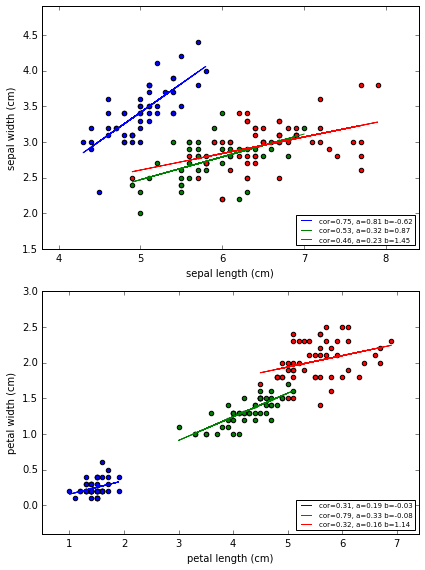

In [8]:
# Cell #8
# We create the figure and define its size
fig = plt.figure(figsize=(6,8))

# plot sepal length vs sepal width
featureX = iris.feature_names[0]
featureY = iris.feature_names[1]
plot_stuff(iris,X1,Y,211, featureX,featureY)

# plot petal length vs petal width
featureX = iris.feature_names[2]
featureY = iris.feature_names[3]
plot_stuff(iris,X2,Y,212,featureX, featureY)

# make layout nice and tight
plt.tight_layout()

# then we plot it as vector graphic (!, not pixels!) 
plt.savefig('Iris.svg',format='svg')

# and finally plot it to screen
plt.show()

In [9]:
# Solution to Task 4b - 1
np.corrcoef?

In [10]:
# Solution to Task 4b -2
np.polyfit?

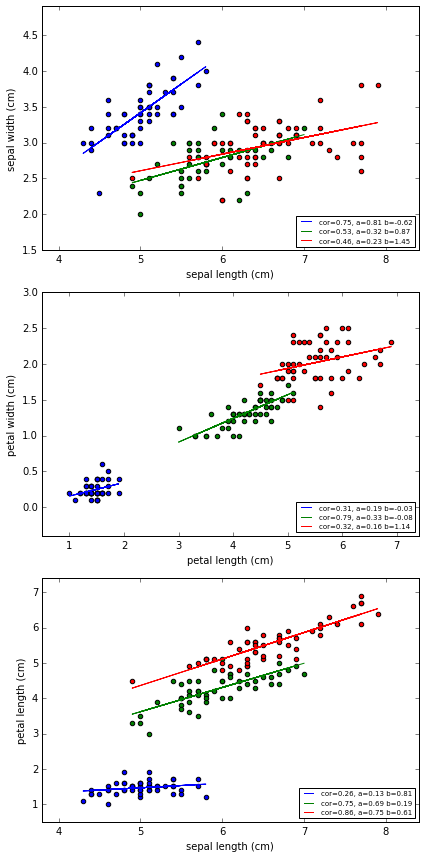

In [11]:
# Solution to Task 4c
# We create the figure and define its size
fig = plt.figure(figsize=(6,12))

# plot sepal length vs sepal width
featureX = iris.feature_names[0]
featureY = iris.feature_names[1]
plot_stuff(iris,X1,Y,311, featureX,featureY)

# plot petal length vs petal width
featureX = iris.feature_names[2]
featureY = iris.feature_names[3]
plot_stuff(iris,X2,Y,312,featureX, featureY)

X3 = iris.data[:,[0,2]]
# plot sepal length vs sepal width
featureX = iris.feature_names[0]
featureY = iris.feature_names[2]
plot_stuff(iris,X3,Y,313, featureX,featureY)


# make layout nice and tight
plt.tight_layout()

# then we plot it as vector graphic (!, not pixels!) 
plt.savefig('Iris.svg',format='svg')

# and finally plot it to screen
plt.show()